<a href="https://colab.research.google.com/github/MedicalImageAnalysisTutorials/ImageRegistrationTutorial/blob/master/IA_InterpolationTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

download and install important libs and sample images



--2021-08-28 14:44:21--  https://github.com/yeatmanlab/AFQ/raw/master/templates/mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_t1_tal_nlin_asym_09a.nii
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yeatmanlab/AFQ/master/templates/mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_t1_tal_nlin_asym_09a.nii [following]
--2021-08-28 14:44:21--  https://raw.githubusercontent.com/yeatmanlab/AFQ/master/templates/mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_t1_tal_nlin_asym_09a.nii
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17350930 (17M) [application/octet-stream]
Saving to: ‘mni_icbm152_t1_tal_nlin_asym_0

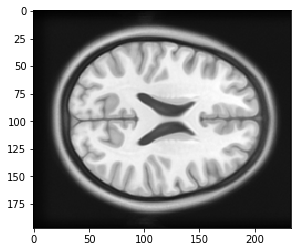

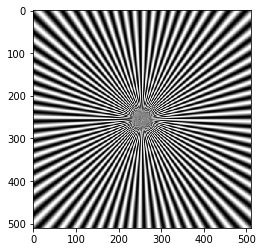

In [4]:
!pip install SimpleITK
!wget https://github.com/yeatmanlab/AFQ/raw/master/templates/mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_t1_tal_nlin_asym_09a.nii
!wget https://github.com/yeatmanlab/AFQ/raw/master/templates/mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_t2_tal_nlin_asym_09a.nii
!wget https://www.spiedigitallibrary.org/ContentImages/Journals/OPEGAR/54/7/074104/WebImages/OE_54_7_074104_f001.png
import os,sys, math, time 
import cv2, scipy, scipy.special

import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import nibabel as nib

from PIL import Image
from functools import partial
from scipy.interpolate import splev, splrep
from scipy.interpolate import BSpline

sys.setrecursionlimit(15000)

# from google.colab import drive
# drive.mount('/content/drive')


import SimpleITK as sitk 

# plotting lib
import matplotlib.pyplot as plt  # the Python plotting package
# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

t1_img = nib.load('mni_icbm152_t1_tal_nlin_asym_09a.nii')
t1_data = t1_img.get_fdata()
 # Show the images by stacking them left-right with hstack
t1_slice = t1_data[:, :, 94]
plt.imshow(t1_slice)

# using SimpleITK
fixedPath  = "mni_icbm152_t1_tal_nlin_asym_09a.nii"
f3d = sitk.GetArrayFromImage(sitk.ReadImage(fixedPath))
img1 = np.rot90(f3d[94, :, :])

img2 = cv2.imread("OE_54_7_074104_f001.png", cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img2)

print(" all done ! ...............")

# Introduction



[Interpolation](https://en.wikipedia.org/wiki/Interpolation) is a problem of estimating data points based on available discrete data points. 

**An Example:**
Assuming we have this table of product price:

```
Date  =  1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000
value =   106,  123,  132,  152,  180,  205,  227,  249,  281   
```
What is the product value in 1988?


**Interpolation function**

The interpolation can be computed using: 

$$
f(x) = \sum_{k \in Z^q} c_k \phi(x-k), \quad x= \in R^q
$$

$f(x)$ is the interpolated value of a data point $x$, $\phi$ is the interpolation function, $c_k$ is an interpolation coefficient. So first we compute the interpolation cofficient $c_k$ from the known data points then we compute $f(x)$ at any point. 








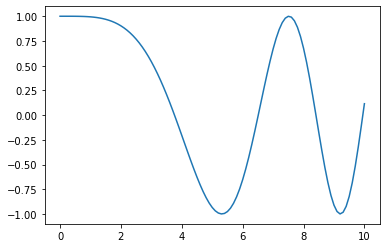

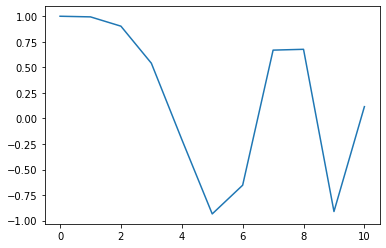

In [5]:
## interpolation function
def phi(x):    
    # we compute phi here, see e.g. linear interpolation section 
    phi_value = 0
    return phi_value

# interpolation using the above phi function
def doInterpolation(x, c , k):
    # x is a data point we need to predict its value f(x),
    # c is interpolation coefficient computed from the available data points
    # k is the integer points contains f(x)  
    fx = 0
    for i in range(len(k)):
        fx += c[i]*phi (x-k[i])
    return fx


# An example: .......................
X = np.linspace(0,10,101) # create data points from 0 to 10, 101 points
Y = np.cos(-X**2/9.0)     # create data values based on a function
plt.plot(X,Y)


K = np.linspace(0,10,11) # create data points from 0 to 10, 11 points
C = np.cos(-K**2/9.0)    # create data values using the same function
plt.figure()
plt.plot(K,C) 
# C is now our coeffcient c_k

# assuming we want to find the value of f(x)=f(3.9)
px = 3.9
# this is how the call should look like
#print("interpolation: f(", px,") = ", doInterpolation(px, Y,k))



## Interpolation vs Regression



# Linear Interpolation



\begin{equation}
    \phi(x) = \begin{cases} 1-|x|, & |x| < 1 \\
                     0    , & 1\le |x| \\
      \end{cases}
\end{equation}

Linear interpolation: f( 3.9 ) =  0.9998527815651753


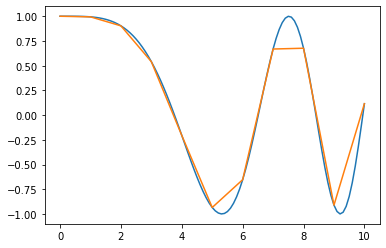

In [ ]:
## linear interpolation
def phi(x):
    if abs(x) < 1:
        phi_value = 1- abs(x)
    else:
        phi_value = 0
    return phi_value

    
px = 3.9
print("Linear interpolation: f(", px,") = ", doInterpolation(px, Y,K))

#plotting 
f=   [ doInterpolation(x,C,K) for x in X ]  
plt.plot(X,Y)
plt.plot(X,f)

time cv:  0.0018770694732666016


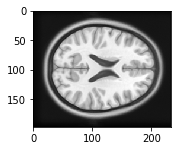

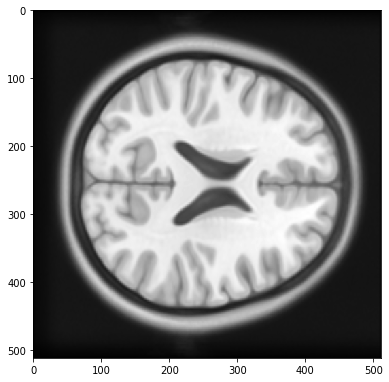

In [ ]:
# 2d linear interpolation
# apply on an image 
# we apply 1d for each row then for each column (or colmns then rows)
# an example is to scale an image 
# the code is slow because it is not optimised 

def phi(x):
    return  1.0- abs(x)  if abs(x) < 1 else 0.0 


#interpolation using the above phi function
def doInterpolation(x, c , k):
    # x is a data point we need to predict its value f(x),
    # c is interpolation coefficient computed from the available data points
    # k is the integer points contains f(x)  
    fx = sum([c[i]*phi(x-k[i])  for i in range(len(k))])
    return fx


def doInterpolation2D(img,nsz):
    # img is a 2d image 
    # newSize is a larger size to scale the image
    sz = img.shape
    #nsz = [700,700]
    img_interp = np.zeros(nsz) 
    img_interpR = np.zeros(nsz) 
    img_interpC = np.zeros(nsz) 

    #print(img.dtype)
    #print (  np.finfo(img) )
    mnD = np.finfo(img.dtype).min ;     mxD = np.finfo(img.dtype).max
    mn = np.min(img) ; mx =np.max(img) 
    # print("data type : ",mnD,mxD)
    # print("img       : ",mn,mx)
    # print (ok)

    for i in range(sz[0]): # for each row 
        # apply 1d interpolation  
        C = img[i,:]                    # C  233 columns
        mn = np.min(C) ; mx =np.max(C) 
        X = np.linspace(mn,mx,nsz[0])     # X = 512
        K = np.linspace(mn,mx, len(C) )   # K = 197 rows
        # print("K : ",len(K))
        # print("C : ",len(C))
        # print("X : ",len(X))
        # print(ok)
        new_r = [ doInterpolation(x , C , K) for x in X]     # f  512 columns
        # print(i, len(old_row), len(oX))
        # plt.plot(C)
        # plt.figure()
        # plt.plot(new_r)
        # print(ok)
        img_interpR[i,:] = new_r

    for i in range(nsz[1]):  # for each col in the interpolated image
        # apply 1d interpolation on the interpolated image
        
        # get a column 
        C = img_interpR[:sz[0],i]        # C  197 rows
        mn = np.min(C) ; mx =np.max(C) 
        X = np.linspace(mn,mx,nsz[1])   # X = 512
        K = np.linspace(mn,mx, len(C))  # K = 197 rows
        # print("K : ",len(K))
        # print("C : ",len(C))
        # print("X : ",len(X))
        new_c = [ doInterpolation(x , C , K) for x in X]     # f  512 columns
        # plt.plot(C)
        # plt.figure()
        # plt.plot(new_c)
        # print(ok)
        img_interpC[:,i] = new_c
        
    
    #img_interp = img_interpR + img_interpC

    return img_interpC



# old_size = img1.shape
# new_size = [512,512]
# print(old_size,new_size)

# st = time.time()

# img_interp =  doInterpolation2D(img1,new_size)

# et = time.time()
# print("time : ", et -st)

# f = plt.figure()
# dpi = 80
# height, width = img1.shape
# figsize = width / float(dpi), height / float(dpi)
# fig = plt.figure(figsize=figsize)
# plt.imshow(img1, cmap='gray')

# height, width = img_interp.shape
# figsize = width / float(dpi), height / float(dpi)
# fig = plt.figure(figsize=figsize)
# plt.imshow(img_interp, cmap='gray')


# plt.show()

# comapre with opencv

st = time.time()

img_interp_cv = cv2.resize(img1, (512, 512), 0, 0, interpolation = cv2.INTER_LINEAR)

et = time.time()
print("time cv: ", et -st)

dpi = 80

plt.figure(figsize=[ img1.shape[0] / float(dpi), img1.shape[1] / float(dpi)])
plt.imshow(img1)
plt.show()

plt.figure(figsize=[ img_interp_cv.shape[0] / float(dpi), img_interp_cv.shape[1] / float(dpi)])
plt.imshow(img_interp_cv)
plt.show()

# Nearest Neighbor Interpolation

\begin{equation}
      \phi(x) = \begin{cases} 0, & x < \frac{-1}{2} \\
                      1, & \frac{-1}{2} \le x < \frac{1}{2} \\
                      0, &  \frac{1}{2} \le x \\
         \end{cases}
\end{equation}


This is an important interpolation that does not introduce new values (useful when working with segmentations or binary images)

NN interpolation: f( 3.9 ) =  0.9998419794705653


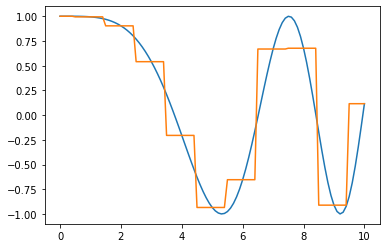

In [6]:
## nearest neighbour interpolation
def phi(x):
    if (x) < -1/2:
        phi = 0
    elif (-1/2 <= x  < 1/2) :
        phi = 1
    elif  1/2<=x:
        phi = 0
    return phi


px = 3.9
print("NN interpolation: f(", px,") = ", doInterpolation(px, Y,K))

#plotting 
f=   [ doInterpolation(x,C,K) for x in X ]  
#plt.figure()
plt.plot(X,Y)
plt.plot(X,f)

0.3043467696988955
90.55689174856525
img1 :  [ 0. 90.]


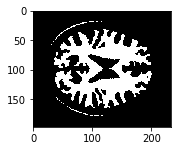

(197, 233) [512, 512]
time :  93.76746034622192
img_interp :  [  0.  90. 180. 270. 360.]


<Figure size 432x288 with 0 Axes>

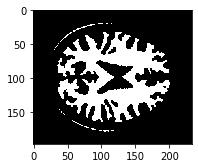

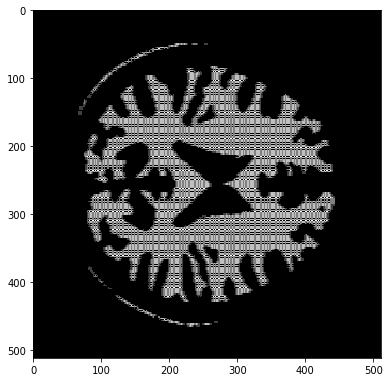

img_interp_cv :  [ 0. 90.]
time cv:  0.013302803039550781


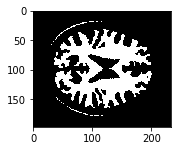

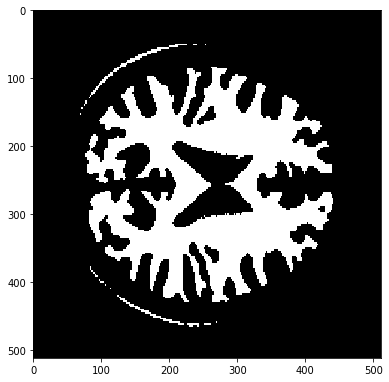

In [20]:
def phi(x):
    if (x) < -1/2:
        phi = 0
    elif (-1/2 <= x  < 1/2) :
        phi = 1
    elif  1/2<=x:
        phi = 0
    return phi

#interpolation using the above phi function
def doInterpolation(x, c , k):
    # x is a data point we need to predict its value f(x),
    # c is interpolation coefficient computed from the available data points
    # k is the integer points contains f(x)  
    fx = sum([c[i]*phi(x-k[i])  for i in range(len(k))])
    return fx


def doInterpolation2D(img,nsz):
    # img is a 2d image 
    # nsz is a new larger size to scale the image
    sz = img.shape
    
    img_interp = np.zeros(nsz) # result
    tmp = np.zeros(nsz)        # temporary result

    for i in range(sz[0]): # for each row 
        # apply 1d interpolation  
        C = img[i,:]                    # C  233 columns
        mn = np.min(C) ; mx =np.max(C) 
        X = np.linspace(mn,mx,nsz[0])     # X = 512
        K = np.linspace(mn,mx, len(C) )   # K = 197 rows
        new_r = [ doInterpolation(x , C , K) for x in X]     # f  512 columns
        tmp[i,:] = new_r

    for i in range(nsz[1]):  # for each col in the interpolated image
        # apply 1d interpolation on the interpolated image        
        # get a column 
        C = tmp[:sz[0],i]        # C  197 rows
        mn = np.min(C) ; mx =np.max(C) 
        X = np.linspace(mn,mx,nsz[1])   # X = 512
        K = np.linspace(mn,mx, len(C))  # K = 197 rows
        new_c = [ doInterpolation(x , C , K) for x in X]     # f  512 columns
        img_interp[:,i] = new_c
            
    return img_interp

t1_img = nib.load('mni_icbm152_t1_tal_nlin_asym_09a.nii')
t1_data = t1_img.get_fdata()
 # Show the images by stacking them left-right with hstack
img1 = t1_data[:, :, 94]

print(np.min(img1))
print(np.max(img1))

# create binary image
th = 70
img1[img1>=th]= 90.0
img1[img1<th] = 0.0

print("img1 : ",np.unique(img1))

plt.figure(figsize=[ img1.shape[0] / float(dpi), img1.shape[1] / float(dpi)])
plt.imshow(img1)
plt.show()


old_size = img1.shape
new_size = [512,512]
print(old_size,new_size)

st = time.time()

img_interp =  doInterpolation2D(img1,new_size)

et = time.time()
print("time : ", et -st)

# TODO: we we have new values???
print("img_interp : ",np.unique(img_interp))

f = plt.figure()
dpi = 80
height, width = img1.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
plt.imshow(img1, cmap='gray')

height, width = img_interp.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
plt.imshow(img_interp, cmap='gray')


plt.show()


# compare with opencv 

st = time.time()

img_interp_cv = cv2.resize(img1, (512, 512), 0, 0, interpolation = cv2.INTER_NEAREST)

print("img_interp_cv : ",np.unique(img_interp_cv))
et = time.time()
print("time cv: ", et -st)

dpi = 80

plt.figure(figsize=[ img1.shape[0] / float(dpi), img1.shape[1] / float(dpi)])
plt.imshow(img1)
plt.show()

plt.figure(figsize=[ img_interp_cv.shape[0] / float(dpi), img_interp_cv.shape[1] / float(dpi)])
plt.imshow(img_interp_cv)
plt.show()

In [ ]:
#2d nn interpolation


# Polynomial Interpolation


The interpolated point can be computed  using a polynomial of degree n. 
$$
f(x) = a_0+a_1 x +a_2x^2+...+a_{n}x^{n}=\sum_{i=0}^n a_ix^i
$$

Lagrange interpolation polynomial is a polynomial of degree $d<=n-1$ that passes through $n$ points.

$$
f(x) = \sum_{i=1}^n L_i(x) f(x_i) \\
L_i(x) = \prod_{j=1, j\ne i}^n (\frac{x-x_j}{x_i-x_j}))
$$

Polynomial interpolation of degree  2  : f( 3.9 ) =  0.0


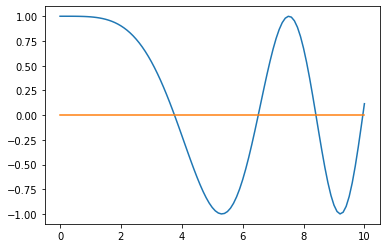

In [ ]:
## lagrange polynomial interpolation
# https://tu-dresden.de/bu/umwelt/hydro/iak/ressourcen/dateien/systemanalyse/studium/folder-2009-01-29-lehre/systemanalyse/LBE/wws-en-03.pdf?lang=en
def Li(i,px,X):
   phi_value =1
   for j in range(len(X)):
        if i != j:
           phi_value = phi_value * ( (px - X[j]) / (X[i] - X[j]) )  
   return phi_value

def doInterpolation(n,px,fX,X):
    # find px 
    i = 0; idx = 0
    for x in X:        
        if px >x:
           idx = i 
           break
        i = i+1   
    # get n points when current point is the center
    tmpX=[]
    a = int((idx-n)/2) if int((idx-n)/2) > 0 else 0
    b = int((idx+n)/2) if int((idx+n)/2) < len(X) else len(X)-1
    for i in range( a, b ):
        tmpX.append(X[i])
    # print(len(tmpX))      
    # print(ok)
    fx = 0.0
    for i in range(1, len(tmpX)):
        fx += fX[i] * Li(i,px,tmpX)
    return fx

n= 2 # degree
px = 3.9
print("Polynomial interpolation of degree ",n," : f(", px,") = ", doInterpolation(n,px,C,K))

# #plotting 
f=   [ doInterpolation(n,x,C,K) for x in X ]  
plt.plot(X,Y)
plt.plot(X,f)


# Convolution
Convolution [1,2] is an importnat mathematical operation on two functions f and g, producing a third function that is typically viewed as a modified version of one of the original functions.
$$\tag{101}
(f∗g)(t)≜\int_{-\infty}^{\infty} f(\tau) g(t−\tau)d\tau 
$$
the symbol  ≜  means "equal by definition", $\tau$ is dummy variable, after the integration is done, we end-up with a function of $t$. 

For programmers this is the discrete form:

$$\tag{102}
(f∗g)[t]= \sum_{\tau=0}^m f[\tau].g[t−\tau] 
$$
m  is the range where the two signals are available at the same time.  m  should not t be larger than  g  length. The Greek letter "tau" $\tau$  is the current location of function $f$ . Usually  $f$  is a large signal or an image while  $g$  as asmall signal or a filter. When  $g$  is an even function e.g.  $g(t)=g(−t)$ convolution is equivalent to correlation.

Note: When you give an impulse function as input, the output will be an impulse response. By the linear and invariant property. If the input signal is a linear combination of impulses, the output will be a linear combination of impulse response. Therefore, if the input is $f[t]=\sum f[\tau].\delta[t−\tau]$, output will be $y[t]=\sum f[\tau].g[t−\tau]$, where $\delta$ is an impulse function, $g$ is the impulse response, so $y[t]$ is the definition of discrete convolution as above.

Remark: Why convolution is defined with flipping one signal, multiply and sum?\
It is because in a Linear time invariant(LTI) system, the output signal = input signal * impulse response. As the example below, $f$ is the input signal and $g$ is the impulse response. The input signal $f$ starts with $1$ and the impulse response start the response with $3$. So we need to 'flip' the $g$ such that $1$ matches $3$ in the starting time. As time goes on, $g$ slides over $f$ so to response to the signals at all time instances.


An example:

f=[1,4,2,5],g=[3,4,1] 

c=f∗g=[3,16,23,27,22,5] 

Note:  length(c)=length(f)+length(g)−1 

source: https://toto-share.com/2011/11/cc-convolution-source-code/

</br>

 <center>
<img src="https://drive.google.com/uc?export=view&id=10qhfmI9XZQc8Iz79e_ZIrxXSB4HrI0w6" width="500"/>
</center>



In [ ]:
# 1d convolution 
def mpConv(f,g,isSame=0):
    #print("1D convolution") 
    fLength = f.shape[0];    gLength = g.shape[0];    
    l = fLength + gLength - 1
    #print("al = ",fLength);    print("bl = ",gLength);    print("l = ",l)
    c = np.zeros(l)
    # we visit all elements of x
    for t in range (l):
        tau = t
        for m in range (gLength):      
            #print("tau : ",tau,"   m: ",m)      
            if ( (tau>=0) and (tau<fLength) ):
                c[t] = c[t] + f[tau] * g[t-tau]  
            tau =tau -1      
    # # support "same" method
    # # this part is still not working
    # if isSame:
    #    nL = (gLength + 1) / 2  if ( not ( ( (gLength - 1) % 2)==0 ) ) else   ((gLength - 1) / 2)
    #    y = np.zeros(fLength) 
    #    for i in range(fLength):
    #        #print(i,nL,y[i])
    #        y[i] = c[nL + i];           
    #    c = y    
    return c

In [ ]:
# 1D convolution example
f1 = np.array([1,4,2,5])
g1 = np.array([3,4,1])
conv1 = mpConv(g1,f1,isSame=0)
print("output signal by mpConv:", conv1)
# using scipy library
from scipy import signal
y=signal.convolve(f1,g1)
print("output signal by scipy:",y)

In [ ]:
# # Convolution example using B-spline # TODO need normalization
# # Bernstein function (B-spline basis function)
# def getBernstein(i,n,t):
#     if (n==0 and i == 0):
#         B = 1
#         if ( t<-0.5 or t>0.5) :
#             B = 0
#     elif n==i :  
#         B =  t * getBernstein(i-1,n-1,t)       
#     elif i==0: 
#         B =  (1-t) * getBernstein(i,n-1,t) 
#     else:
#         B = (1-t) * getBernstein(i,n-1,t)  + t * getBernstein(i,n-1,t) 
#     return B

# #define a range 
# t = np.linspace(-5,5, 500)

# # beta 0 is a square pulse function centered at 0 
# B0 = [getBernstein(0,0,x) for x in t]
# plt.plot(t,  B0  ,label='B0') 


# # beta n is a onvolution of beta 0 n+1 times 
# n = 3 ; 

# # initislisation 
# Bs = [getBernstein(0,0,x) for x in t]
# for i in range(n): # we stop at n as we already initialised once 
#     Bs = mpConv (np.array(B0),np.array(Bs))

# r1 =  int( (n)   * len(Bs)/ (2*(n+1)) )   
# r2 =  int( (n+2) * len(Bs)/(2*(n+1)))+1 if n%2==0 else    int( (n+2) * len(Bs)/(2*(n+1))) 
# Bs = Bs[r1:r2] 
# # for plotting as the range is changing   
# # output of convolution is a signal larger than each input signal
# print("B-spline basis function, n = ", n)
# # plt.plot(t, Bs   ) 
# plt.legend()

In [ ]:
# 2D convolution # TODO still some variations on different sizes of output after convolution
# Ref: http://www.songho.ca/dsp/convolution/convolution.html#convolution_2d
# g is the filter/kernel, after convolution will get an array same size as f
# for filter/kernel with odd numbers only
def mpConv2D(f,g,isSame=0):
    #print("2D convolution") 
    fLength = f.shape[0];    gLength = g.shape[0];
    fWidth  = f.shape[1];    gWidth  = g.shape[1];  
    # l = fLength + gLength - 1
    # w = fWidth + gWidth - 1
    kCenterX = int((fWidth - 1) / 2)
    kCenterY = int((fLength - 1) / 2)
    # print("al = ",fLength);    print("bl = ",gLength);    print("l = ",l)
    # print("aw = ",fWidth);    print("bw = ",gWidth);    print("w = ",w)
    c = np.zeros((fLength,fWidth))
    # we visit all elements of x and y
    for t in range(fLength): # rows
        for k in range(fWidth): # columns
            for m in range(gLength): # kernel rows
                mm = gLength-1-m # row index of flipped kernel
                for n in range(gWidth): # kernel columns
                    nn = gWidth-1-n # column index of flipped kernel

                    # index of input signal, used for checking boundary
                    tau = t + (kCenterY - mm)
                    kappa = k + (kCenterX - nn)

                    # ignore input samples which are out of bound
                    if( tau >= 0 and tau < fLength and kappa >= 0 and kappa < fWidth ):
                        
                        # print(tau,kappa)
                        c[t][k] = c[t][k] +  f[tau][kappa] * g[mm][nn]
                        # c[t][k] = c[t][k] +  f[tau][kappa] * g[t-(tau-kCenterY)][k-(kappa-kCenterX)]
    return c

In [ ]:
# Ref: https://github.com/ashushekar/image-convolution-from-scratch
# for filter/kernel with odd numbers only
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)
    # padding size
    kCenterX = int((kernel.shape[1] - 1) / 2)
    kCenterY = int((kernel.shape[0] - 1) / 2)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + kernel.shape[0] - 1,
                             image.shape[1] + kernel.shape[1] - 1))
    image_padded[kCenterX:-kCenterX, kCenterY:-kCenterY] = image


    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+kernel.shape[1],
                                                x: x+kernel.shape[0]]).sum()

    return output

In [ ]:
# 2D convolution example
# f2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
g2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
f2 = np.array([[25,100,75,49,130],[50,80,0,70,100],[5,10,20,30,0],
               [60,50,12,24,32],[37,53,55,21,90],[140,17,0,23,222]])
# g2 = np.array([[1,0,1],[0,1,0],[0,0,1]])
# f2 = np.array([[0,1,2],[3,4,5],[6,7,8]])
# g2 = np.array([[0,1],[2,3]])
# f2 = np.array([[2,2,3,3,3],[0,1,3,0,3],[2,3,0,1,3],
#                [3,3,2,1,2],[3,3,0,2,3]])
# g2 = np.array([[2,0,1],[1,0,0],[0,1,1]])
# g2 = np.array([[2,2,3,3,3],[0,1,3,0,3],[2,3,0,1,3],
#                [3,3,2,1,2],[3,3,0,2,3]])
conv2 = mpConv2D(f2,g2,isSame=0)
print(conv2)
y2 = convolve2d(f2, g2)
print(y2)
y=signal.convolve(f2,g2,mode='full')
print(y)

# Z-transform


$\color{red}{\text{Todo: add examples and implementation}}$

ref with example: https://www.tutorialspoint.com/digital_signal_processing/dsp_z_transform_inverse.htm


The [$\color{blue}{\text{Z-transform}}$](https://en.wikipedia.org/wiki/Z-transform#:~:text=In%20mathematics%20and%20signal%20processing,equivalent%20of%20the%20Laplace%20transform.) of a signal $x[n]$ is defined as:
$$\tag{1}
X(z) = \sum_{n=-\infty}^\infty x[n]z^{-n},
$$ 
where $z$ is a complex variable. 


$$
z = A. e^{j\phi}= A.(cos(\phi)+j. sin(\phi))
$$

where $A$ is the magnitude of $z$, $\phi$ is the angle from x-axis to the complex number axis and $j$ is the imagenry unit. 

<img src='https://upload.wikimedia.org/wikipedia/commons/7/7a/Complex_number_illustration_modarg.svg' />

The $z$-transform is a discrete analog of the [$\color{blue}{\text{Laplace transform}}$](https://en.wikipedia.org/wiki/Laplace_transform#:~:text=In%20mathematics%2C%20the%20Laplace%20transform,(complex%20frequency).) of continuous functions.

$\color{red}{\text{Laplace transform equation}}$
It exists at all points in the complex plane where the series on the right hand side is absolutely convergent. That is, all points $z \in \mathbb{C}$ where
$$\tag{2}
\sum_{n=-\infty}^\infty \Big|x[n]z^{-n}\Big|
$$ exits. The region of the complex plane where $X(z)$ exists is called the region of convergence $ROC$ of the $z$-transform.

The $\color{blue}{\text{convolution}}$ of signals $x[n]$ and $y[n]$ is defined as 
$$\tag{3}
u[n] = (x \star y)[n] = \sum_{m=-\infty}^\infty x[m]y[n-m].
$$


It can be shown that the $z$-transform of a convolution of two signals is a product of the $z$-transforms of the signals. This is analogous to the property of discrete Fourier transform (which is a special case of $z$-transform), the continuous Fourier transform and the continuous Laplace transform. 


In mathematical terms:

 $U(z) = X(z)Y(z)$

 We can unravel the original signal $x[n]$ in a convolution by taking the inverse $z$-transform of $U(z)/Y(z)$ at all points where $Y$ does not vanish, that is become $0$.


The adjoint of a signal is defined as $x^\ast[n] = \overline{x[-n]}$. This is analogous to the definition of the hermitian adjoint of a matrix. It is just the complex conjugate of the transpose. The $z$-transform of the adjoint signal is 
$$\tag{4}
X^\ast(z) = \sum_{k=-\infty}^\infty x^\ast[k]z^{-k} = \sum_{k=-\infty}^\infty \overline{x[-k]\bar{z}^{-k}} = \sum_{k=-\infty}^\infty \overline{x[k]\bar{z}^{k}} = \sum_{k=-\infty}^\infty \overline{x[k]\left(\frac{1}{\bar{z}}\right)^{-k}} = \overline{X\left(\frac{1}{\bar{z}}\right)}.
$$
In the case of a real-valued signal $x^\ast[n] = x[-n]$ and
$$\tag{5}
X^\ast(z) = \sum_{k=-\infty}^\infty x^\ast[k]z^{-k} = \sum_{k=-\infty}^\infty x[-k]z^{-k} = \sum_{k=-\infty}^\infty x[k]z^{k} = \sum_{k=-\infty}^\infty x[k]\left(\frac{1}{z}\right)^{-k} = X\left(\frac{1}{z}\right).
$$

Up-sampling a signal means increasing the number of sample points by a certain factor. We can up-sample a signal by a factor $m$ by inserting $m - 1$ zeros between successive values of the signal. Mathematically, an upsampled signal is defined as
$$\tag{6}
x_{\uparrow m}[n] = \begin{cases}
x[l] & \text{ if } n = ml \\
0    & \text{ otherwise.}
\end{cases}
$$
We can easily get an expression for the $z$-transform of an up-sampled signal.
$$\tag{7}
X_{\uparrow m}(z) = \sum_{k=-\infty}^\infty x_{\uparrow m}[n]z^{-n} = \sum_{k=-\infty}^\infty x[n]z^{-mn} = X(z^m).
$$

We can down-sample a signal by a factor of $m$ by selecting every $m$th of its sample. Mathematically a down-samples signal is defined as
$$\tag{8}
x_{\downarrow m}[n] = x[nm].
$$
Let us now get an expression for $z$-transform of the downsampled signal.
$$\tag{9}
X_{\downarrow m}(z) = \sum_{k=-\infty}^\infty x_{\downarrow m}[k]z^{-k} = \sum_{mk=-\infty}^\infty x[mk]z^{-k} = \sum_{k \in m\mathbb{Z}} x[k]z^{-mk}.
$$
The set $m\mathbb{Z}$ is the set of all multiples of $m$, that is $\{\ldots, -2m -m, 0, m, 2m, \ldots\}$. Evaluating this sum involves a bit of care for the sum is not over $\mathbb{Z}$ but $m\mathbb{Z}$. To proceed, we use the fact
$$\tag{10}
\sum_{j=0}^{m-1}\exp\left(\frac{2\pi ijn}{m}\right) = \begin{cases}
m & \text{ for } n \in m\mathbb{Z} \\
0 & \text{ otherwise.}
\end{cases}
$$
It allows us to define the pulse sequence
$$\tag{11}
p_m[n] = \frac{1}{m}\sum_{j=0}^{m-1}\exp\left(\frac{2\pi ijn}{m}\right) = \begin{cases}
1 & \text{ if } n \in \mathbb{Z} \\
0 & \text{ otherwise.}
\end{cases}
$$
We can then write
$$\tag{12}
X_{\downarrow m}(z) = \sum_{k \in \mathbb{Z}} p_m[k]x[k]z^{-k},
$$ where the summation extends over all integers. After substituting the expression for $p_m[k]$ we readily get
$$\tag{13}
X_{\downarrow m}(z) = \frac{1}{m}\sum_{j=0}^{m-1}X\left(e^{-2\pi ij/m}z^{1/m}\right).
$$


# Interpolation using Z-transform

source: http://www.ipol.im/pub/art/2011/g_lmii/

Given input image $v_{m,n}$ the interpolation finds a function $u(x,y)$ that approximate the image:

$$
v_{m,n} = u(m,n) for all m,n \in Z
$$

One can use Fourier transform and bilateral Z-transform:

$$
\hat{f}(\zeta) = \int_{-\inf}^{\inf} f(x) e^{-2 \pi i \zeta} dx \\
c(z) := \sum_{-\inf}^{\inf} c_n z^{-n}
$$

where:

* $\hat{f}(\zeta)$ is the Fourier transform of $f(x)$ 
*  $c_n$ is a sequence and $c(z)$ is its $Z$ transform.



## Interpolation Kernels

Linear interpolation can be described as a linear operator $Z$ mapping samples $v$ to a function $u = Z(u)$. If $Z$ is a linear, shift-invarient local operator then there exist a unique function $K$ called the **interpolation kernel** such that: 

$$
Z(v)(x,y) = \sum_{m,n \in Z} K(x-m,y-n) 
$$






## Two-step interpolation


Interpolation can be expressed as a basis function $\phi(t)$ and a linear combination of compact support functions.

$$
u(t) = \sum_{n \in Z} C_n \phi(t-n) \\
f_m = \sum_{n \in Z} c_n \phi(m-n)
$$

This way the interpolation can be computed in 2 steps: 
1. solve for the coefficient $c_n$
2. compute $\sum c_n \phi(t-n)$


$u(t) = \sum_{n \in Z} C_n \phi(t-n)$ is equivalent to convolution $f_n=(c*p)_m$, where $p_m = \phi_m$. Which means we can use $Z$ transform to solve for $c_n$ 

$$
f(z) = c(z)p(Z) \\
c(z) = \frac{1}{p(z)}f(z)
$$


Assuming $(p)^{−1}$ the convolution inverse of $p$,then we have 
$$
p (p)^{−1} = \delta
$$ 

where $\delta$ is the unit impulse ($\delta_0 := 1$, and 0 otherwise). 

Using  $(p)^{−1}$ we obtain $c_n$ by “prefiltering” as:
$$
c = (p)^{−1} ∗ f.
$$
$(p)^{−1}$ can be factored into pairs of recursive (infinite impulse response) filters, allowing for an  efficient in-place calculation.

$$
u(t) = \sum_{m \in Z}((p)^{-1}*f)_n\phi(t-n)\\
u(t) = \sum_{m \in Z}f_m \sum_{n \in Z}((p)^{-1})_{n-m}\phi(t-n)\\
u(t) = \sum_{m \in Z}f_m K_1(t-m),\\
K_1(t)=\sum_{n \in Z}((p)^{-1})_{n}\phi(t-n)\\
$$






## Nearest Neighbor

The interpolation kernel for Nearest Neighbor is:

$$
K(x,y) = K_1(x)K_1(y),\\
K_1(t) = \begin{cases} 1 , & \frac{-1}{2} \le t < \frac{1}{2} \\
                     0    , & otherwise \\
       \end{cases}
$$




## Bilinear


The biliner interpolation kernel is:

$$
K(x,y) = K_1(x)K_1(y),\\
K_1(t) = \begin{cases} 1-|t| &, |t| < 1 \\
                     0    &, otherwise  \\
         \end{cases}
$$


## Bicubic

The bicubic interpolation kernel is:

$$
K(x,y) = K_1(x)K_1(y),\\
K_1(t) = \begin{cases} (\alpha+2)|t|^3-(\alpha+3)|t|^2+1,   & |t| \le 1 \\
                       \alpha|t|^3 - 5 \alpha|t|^2+8 \alpha |t|^-4 \alpha   &, 1 < |t| < 2  \\
                       0    &, otherwise  \\
         \end{cases}
$$


## Splines



## From Interpolation to Convolution



\begin{equation}
 f(x) =  \sum_{k \in Z^q}^{} f_k \psi_{int}(x-k) \forall x = (x_1,x_2,...,x_q) \in R^q,
\end{equation}
where an interpolated value $f(x)$ at some (perhaps non-integer) coordinate $x$ in a space of dimension **q**. Here, $f(x)$ is the linear combinations of $f_k$, which is the sample value evaluated at integer coordinates $k=(k_1,k_2,...,k_q)\in Z^q$, and the weight $\psi_{int}(x-k)$.

The summation is performed all over the integer coordinates $k\in Z^q$. But in fact there are not actually exist a sample $f_k$. Since the number of known samples is finite, thus in order to satisfy the above equation, we need to extend this finite number to infinity by setting suitable boundary conditions over the interpolated function, for example using mirror symmetries.

Now the value of any $f_k$ is defined.

Consider the above equation with $x=k_0$ which are integers:
\begin{equation}
 f_{k_0} =  \sum_{k \in Z^q}^{} f_k \psi_{int}(k_0-k) \forall k_0 \in Z^q,
\end{equation}
This equation is the $\textbf{interpolation constraint}$.<br>
We introduce $p_k=\psi_{int}(k)$.
\begin{align*} 
 f_{k_0}
&= \sum_{k \in Z^q}^{} f_k p(k_0-k)\\
&= \sum_{k = -\infty}^{\infty} f(k) p(k_0-k),
\end{align*}<br>
where $f,p$ are defined on the set $Z$ of integers.
 This equation is equivalence to a $\textbf{discrete convolution}$(We will prove it in a later section) . Thus the equation can be rewritten as
\begin{equation}
 f_{k_0} =  (f*p)_{k_0} \forall k_0 \in Z^q,
\end{equation}

The first equation is not a convolution since $\psi_{int}$ may be evaluated at noninteger values.

Convolution will be discussed in later section.


Generalized interpolation:
Now we consider
\begin{equation}
 f(x) =  \sum_{k \in Z^q}^{} c_k \psi_(x-k), \forall x \in R^q,
\end{equation}
We have to determine the coefficient $c_k$ from samples $f_k$ and $f(x)$ from $c_k$. Now the function is not necessarily finite support nor satisfy the interpolation property.

Consider again integer arguments $x=k_0$,
\begin{equation}
 f_{k_0} =  \sum_{k \in Z^q}^{} c_k p_{k_0-k} \forall k_0 \in Z^q,
\end{equation}
where $p_k=\psi(k)$.
The equation is a system of linear equations $f=Pc$ with unknown coefficients $c_k$. The dimension of the system is infinite since the number of integers $k_0$ in the set $Z^q$ is infinite, and the system is infinite with respect to the number of unknowns(since all indexes $k \in Z^q$ are considered in the sum). We can reduce the system to finite dimension(finite number of equations) with number of known samples $k_0$, and at the same time constrain $\psi$ to be finite-support(limits the number of unknowns). Then we solve for $c=P^{-1}f$.

Another method is to treat the above equation as a $\textbf{discrete convolution equation}$ which can be written as
\begin{equation}
 f_{k_0} =  (c*p)_{k_0} \forall k_0 \in Z^q.
\end{equation}
Convolving both sides by $(p)^{-1}_k$, we have
\begin{equation}
 c_{k} =  ((p)^{-1}*f)_{k_0} \forall k_0 \in Z^q.
\end{equation}

The problem becomes a $\textbf{digital filtering problem}$.

$\textbf{Note: Discrete convolution is a digital filtering operation.}$


**New part:...**


Ref: https://zipcpu.com/dsp/2018/01/16/interpolation-is-convolution.html

Here we show Interpolation is just a special type of convolution.

Let $f(t)=\sum_{n=-\infty}^{\infty}f[n]\delta(t-n)$ be the discrete input signal, $g(t)$ is the impulse response and $y(t)$ is the output signal.

By definition of convolution,

\begin{equation}
\begin{split}
y(t)
&=\int_{-\infty}^{\infty} g(t-\tau) f(\tau)d\tau\\
&=\int_{-\infty}^{\infty} g(t-\tau) \sum_{n=-\infty}^{\infty}f[n]\delta(\tau-n)d\tau\\
&=\sum_{n=-\infty}^{\infty}f[n]\int_{-\infty}^{\infty} g(t-\tau) \delta(\tau-n)d\tau\\
&=\sum_{n=-\infty}^{\infty}f[n]\int_{-\infty}^{\infty} g(t-\tau) \delta(n-\tau)d(t-\tau)\\
&=\sum_{n=-\infty}^{\infty}f[n]\int_{-\infty}^{\infty} g(t-\tau) \delta(t-\tau-(t-n))d(t-\tau)\\
&=\sum_{n=-\infty}^{\infty}f[n]g[t-n], \textrm{(by translational property)},
\end{split}
\end{equation} 

which is same as the interpolation. We will see $f[n]$ is our coefficients $c(k)$ and $g[t-\tau]$ is our b-spline basis function $\beta(x-k)$ in later section.

$$y(t)=\sum_{n=-\infty}^{\infty}f[n]g[t-n]<=>f(x) =   \sum_{k=0}^{N-1} c(k)\beta^n(x-k)$$

## B-spline by Convolution

Ref: 1999 IEEE Unser Splines_ a perfect fit for signal and image processing

Mathematically, $\beta^n(x)$ is the B-spline basis function of degree $n$ is defined through $n+1$ convolution with rectanglar pulse function $\beta^0(x)$. 
$$\tag{1}
$$
\begin{equation}
  \beta^0(x) =
    \begin{cases}
      1 & -\frac{1}{2} <x< \frac{1}{2}\\
      \frac{1}{2} & |x|=\frac{1}{2}\\
      0 & \text{otherwise}\\
    \end{cases} 
\end{equation}
 <br>
\begin{equation}
\beta^n(x) =    \underbrace{\beta^0*\beta^0*...*\beta^0(x)}_\text{$n+1$ times}
\end{equation}

The convolution is defined as follows: <br>
$$\tag{2}
$$
\begin{equation}
\beta^n(x) =  \int_{-\infty}^{\infty} \beta^{n-1}(x-t)\beta^0(t) \,dt  
\end{equation}

Using the convolution theorem of Fourier transform, $(f*g)(x)=\hat{f}(\omega)\hat{h}(\omega)$.

$$\tag{3}
\hat{\beta}^n(\omega) =  (\int_{-\infty}^{\infty} \beta^{0}(x)e^{-j\omega x} \,dx)^{n+1}= (\int_{-\frac{1}{2}}^{\frac{1}{2}} 1\cdot e^{-j\omega x} \,dx)^{n+1}
= \left(\frac{\sin(\frac{\omega}{2})}{\frac{\omega}{2}}\right)^{n+1}
$$

Consider the one-sided power function
$$\tag{4}
$$
\begin{equation}
  (x)^n_+ =
    \begin{cases}
      x^n & x \geq 0\\
      0 & x< 0\\
    \end{cases} 
\end{equation} <br>

The $(n+1)$th order derivative of $(x)^n_+$ is $D^{n+1}(x)^n_+=n!\delta(x)$ and in Fourier domain, it gives $(j\omega)^{n+1}X^n_+(\omega)=n!$. Thus,
$$\tag{5}
$$
\begin{align*}
\hat{\beta}^n(\omega)
&=(\frac{\sin{\omega/2}}{\omega/2})^{n+1}\\
&=(\frac{e^{j\omega/2}-e^{-j\omega/2}}{j\omega})^{n+1}
\frac{(j\omega)^{n+1}X^n_+(\omega)}{n!} \\
&=\frac{1}{n!}(e^{j\omega/2}-e^{-j\omega/2})^{n+1}X^n_+(\omega)\\
&=\frac{1}{n!}\sum_{k=0}^{n+1}{n+1 \choose k}(-1)^{k}e^{-j\omega(k-(n+1)/2)}X^n_+(\omega)
\end{align*}

Thus, by inverse Fourier transform,
$$\tag{6}
\beta^n(x)=\frac{1}{n!}\sum_{k=0}^{n+1}{n+1 \choose k}(-1)^{k}(x-k+\frac{n+1}{2})^n_+,
$$
since the shift in x domain is the exponential phase factor in fourier domain.




In [ ]:
# Using the equation 6 above which is the explicit mathematical expression after convolution:
# TODO: create a separate document for the previous part 
#       and re-number the equations
def Bn(n,x):
    Bn = 0
    # print("n ------------------------")
    for k in range(n+2):
        t1 = scipy.special.binom(n+1, k)
        t2 = math.pow(-1,k)
        if x-k+((n+1)/2.0)>=0:
           t3 = float(math.pow( x-k+((n+1)/2.0),n))
        else:
           t3 = 0
        # print("t1,t2,t3 : ",t1,t2,t3)   
        Bn = Bn + t1 * t2 * t3  
    Bn = float(Bn   / math.factorial(n) )  
    # print("Bn : ", Bn)
    # print("--------------------------------")
    return Bn

# As a comparison, this is the result from B-spline by interpolation 
def  B(n, i, x, t):
    # \beta^n_0: the recursion stopping condition
    if n == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
        # return 1.0 if t[i] <= x =< t[i+1] else 0.0

    else:    
        #\beta^n_i recursion with two branches
        # handling division by zero situations
        C1 =0.0  if t[i+n]   == t[i]   else ( (x-t[i])/(t[i+n]-t[i]))          * B( n-1 ,i  , x,t)
        C2 =0.0  if t[i+n+1] == t[i+1] else ( (t[i+n+1]-x)/ (t[i+n+1]-t[i+1])) * B( n-1 ,i+1, x,t)    
    return  C1 + C2  
 
# Using the equation 6 above which is the explicit mathematical expression after convolution:
plt.title("B-spline basis function")
y = np.linspace(-5,5, 1000) # smaller the division, higher the accuracy
y0 = [ Bn(0,k)    for k in y]
y1 = [ Bn(1,k)    for k in y]
y2 = [ Bn(2,k)    for k in y]
y3 = [ Bn(3,k)    for k in y]
plt.plot(y,y0,label='n=0')
plt.plot(y,y1,label='n=1')
plt.plot(y,y2,label='n=2')
plt.plot(y,y3,label='n=3')
# this has same result as convolution but with shifting
b0= [B(0,0,k,y)  for k in y]
b1= [B(1,1,k,y)  for k in y]
b2= [B(2,2,k,y)  for k in y]
b3= [B(3,3,k,y)  for k in y]
# plt.plot(y,b0,label='b0')
# plt.plot(y,b1,label='b1')
# plt.plot(y,b2,label='b2')
# plt.plot(y,b3,label='b3')
plt.legend()

### Example: Cubic B-spline Basis Function

By eq 6 and take cubic b-spline as an example:
\begin{equation} 
\begin{split}
\beta^3(x)
&=\frac{1}{3!}\sum_{k=0}^{3+1}{3+1 \choose k}(-1)^{k}(x-k+\frac{3+1}{2})^3_+\\
&=\frac{1}{6}\sum_{k=0}^{4}{4 \choose k}(-1)^{k}(x-k+\frac{4}{2})^3_+\\
&=\frac{1}{6}(x+2)^3_+ -\frac{2}{3}(x+1)^3_+ + x^3_+ - \frac{2}{3}(x-1)^3_+ + \frac{1}{6}(x-2)^3_+\\
& =
    \begin{cases}
      \frac{1}{6}(x+2)^3 & x \geq -2\\
      \frac{1}{6}(x+2)^3 -\frac{2}{3}(x+1)^3 & x \geq -1\\
      \frac{1}{6}(x+2)^3 -\frac{2}{3}(x+1)^3 + x^3 & x \geq 0\\
      \frac{1}{6}(x+2)^3 -\frac{2}{3}(x+1)^3 + x^3 - \frac{2}{3}(x-1)^3 & x \geq 1\\
      \frac{1}{6}(x+2)^3 -\frac{2}{3}(x+1)^3 + x^3 - \frac{2}{3}(x-1)^3 + \frac{1}{6}(x-2)^3 & x \geq 2\\
    \end{cases} \\
& =
    \begin{cases}
      0 & x < -2\\
      \frac{1}{6}(2+x)^3 & -2 \leq x < -1\\
      \frac{1}{6}(4-6x^2-3x^3) & -1 \leq x < 0\\
      \frac{1}{6}(4-6x^2+3x^3) & 0 \leq x < 1\\
      -\frac{1}{6}(-2+x)^3 & 1 \leq x < 2\\
      0 & x \geq 2\\
    \end{cases} \\
& =
    \begin{cases}
      0 & x < -2\\
      \frac{1}{6}(2+x)^3 & -2 \leq x < -1\\
      \frac{1}{6}(4-6x^2-3x^3) & -1 \leq x < 0\\
      \frac{1}{6}(4-6x^2+3x^3) & 0 \leq x < 1\\
      -\frac{1}{6}(-2+x)^3 & 1 \leq x < 2\\
      0 & x \geq 2\\
    \end{cases} \\
& =
    \begin{cases}
      \frac{2}{3} - |x|^2 + \frac{|x|^3}{2} & 0 \leq |x| < 1\\
      \frac{(2-|x|)^3 }{6}& 1 \leq |x| < 2\\
      0 & \textrm{otherwise}\\
    \end{cases} \\
\end{split}
\end{equation} 

We showed here the cubic b-spline basis function by convolution is the same as the cubic b-spline basis function by interpolation before.

### B-spline Basis Function

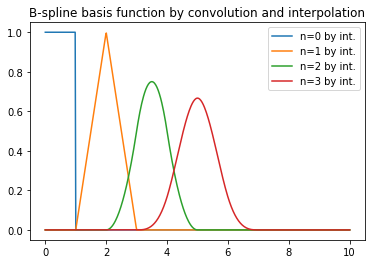

In [ ]:
# Ref http://shulgadim.blogspot.com/2014/01/introduction-to-splines-b-spline.html

# this function compute the basis B-spline function from degree 0 to 3 of a point x
# maunually computed, no recursion is used
# how these functions are computed ??? is it the same as de boor ?
# I showed in the above cell for cubic b-spline

def iaBnx(n, x):
    #print("BSplines::bspline, degree, shape ",degree, x.shape)
    betta = 0
    if n == 0:
        t= 0.5 
        if x > -0.5 and x < 0.5:
            betta = 1.0
        elif abs(x) == 0.5:
            betta = 0.5
        elif abs(x) > 0.5:
            betta = 0.0
    elif n == 1:
        t = 1
        #if x <= -1 or x >= 1:
        if x <= (0-t) or x >=  (n+1)-t:
            betta = 0.0
        elif x > -1 and x < 0:
            betta = x + 1
        elif x > 0 and x < 1:
            betta = -x+1
        elif x == 0:
            betta = 1.0
    elif n == 2:
        t = 1.5
        if x <= (0-t) or x >= (3-t):
            betta = 0.0
        elif x >= (0-t) and x < (1-t):
            betta = ((x+t)*(x+t))/2.0
        elif x >= (1-t) and x< (2-t):
            betta = ((x+t)*(x+t)-3.0*(x-1+t)*(x-1+t))/2.0
        elif x >= (2-t) and x< (3-t):
            betta = ((x+t)*(x+t) - 3.0*(x-1+t)*(x-1+t) + 
                    3.0*(x-2+t)*(x-2+t))/2.0
    elif n == 3:
        ax = abs(x)
        if ax >= 0 and ax < 1:
            betta = 2.0/3.0 - ax * ax + (ax*ax*ax)/2.0
        elif abs(x) >= 1 and abs(x) < 2:
            betta = ((2-ax)*(2-ax)*(2-ax))/6.0
        elif abs(x) >= 2:
            betta = 0.0

    return betta

# As a comparison, this is the result from B-spline by interpolation 
def  B(n, i, x, t):
    # \beta^n_0: the recursion stopping condition
    if n == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
        # return 1.0 if t[i] <= x =< t[i+1] else 0.0

    else:    
        #\beta^n_i recursion with two branches
        # handling division by zero situations
        C1 =0.0  if t[i+n]   == t[i]   else ( (x-t[i])/(t[i+n]-t[i]))          * B( n-1 ,i  , x,t)
        C2 =0.0  if t[i+n+1] == t[i+1] else ( (t[i+n+1]-x)/ (t[i+n+1]-t[i+1])) * B( n-1 ,i+1, x,t)    
    return  C1 + C2  
       
x = np.linspace(-5, 5, 500)
x2 = np.linspace(0, 10, 500)
t = [0,1,2,3,4,5,6,7] # define the knot vector

# this has same result as mathematical expression from convolution
b0= [iaBnx(0,k)  for k in x]
b1= [iaBnx(1,k)  for k in x]
b2= [iaBnx(2,k)  for k in x]
b3= [iaBnx(3,k)  for k in x]

# this has same result as convolution but with shifting
B0= [B(0,0,k,t)  for k in x2]
B1= [B(1,1,k,t)  for k in x2]
B2= [B(2,2,k,t)  for k in x2]
B3= [B(3,3,k,t)  for k in x2]

plt.title("B-spline basis function by convolution and interpolation")
plt.plot(x,b0, label='n=0 by con.') # basis function degree 0, step 
plt.plot(x,b1, label='n=1 by con.') # basis function degree 1, linear
plt.plot(x,b2, label='n=2 by con.') # basis function degree 2, quadratic
plt.plot(x,b3, label='n=3 by con.') # basis function degree 3, cubic
#this is same as B-spline by convolution but with shifting
plt.plot(x2,B0, label='n=0 by int.') # basis function degree 0, step 
plt.plot(x2,B1, label='n=1 by int.') # basis function degree 1, linear
plt.plot(x2,B2, label='n=2 by int.') # basis function degree 2, quadratic
plt.plot(x2,B3, label='n=3 by int.') # basis function degree 3, cubic
plt.legend()

Ref: 1999 IEEE Unser Splines_ a perfect fit for signal and image processing

Simon Haykin, Barry Van Veen - Signals and Systems-Wiley (1998)

In order to interpolate the function that fit the discrete signal $f(k)$, where $k\in\mathbb{Z}$ the corresponding coefficients $c(l)$ are determined for the B-spline curve.
\begin{equation} \tag{1}
    f(k) =   \sum_{l=-\infty}^{\infty} c(l)\beta^n(x-l)|_{x=k},
\end{equation}

which can be written as the form in discrete convolution.


\begin{equation}\tag{2}
    f(k) =   b^n_1(k) * c(k),
\end{equation}

where we define the discrete B-spline of order n with a expanded factor $m$: $b^n_m(k)=\beta^n(x/m)|_{x=k}$. Here we take $m=1$.

The Z-transform of a function $f(k)$ is defined as :

$$
   F(z) = \mathcal{Z}(f(k))= \sum_{k=0}^{\infty} f(k)z^{-k}
$$

Apply the Z-transform on (\ref{2}) and property of convolution,

\begin{equation}
   \mathcal{Z} (f(k)) = \mathcal{Z}  (b^n_1(k) * c(k))
\end{equation}


\begin{equation}
    F(z) =   B^n_1(z)C(z),
\end{equation}

Thus,
\begin{equation}
    C(z) =   \left(B^n_1(z)\right)^{-1}F(z),
\end{equation}

By inverse Z-transform and define the inverse convolution operator $(b^n_1)^{-1}(k)$. The coefficient $c(k)$ could be obtained by inverse filtering

\begin{equation}
    c(k) =   (b^n_1)^{-1}(k) * f(k),
\end{equation}



where $(b^n_1)^{-1}(k)$ is the inverse z-transform of $B^n_1(z)^{-1}$. We define the transfer function
\begin{equation}
    S^n(z) =   B^n_1(z)^{-1} = \frac{1}{\sum_{k=0}^{n+1}b_1^n(k)z^{-k}},
\end{equation}

$S^n(z)$ is also the response of a recursive infinite impulse response(IIR) filter. 

A transfer function $H(z)$ could also be obtained from difference equation of a system. An $N$th order difference equation relates the input $f[n]$ to the output $c[n]$ as

\begin{equation}
     \sum_{k=0}^{N}a_k c[n-k] =   \sum_{k=0}^{M}b_k f[n-k] ,
\end{equation}

If the input $f[n]=z^n$, the output is $c[n]=z^nH(z)$. Thus,

\begin{equation}
     z^n \sum_{k=0}^{N}a_k z^{-k}H(z) =   z^n \sum_{k=0}^{M}b_k z^{-k} ,
\end{equation}

\begin{equation}
     H(z) =   \frac{\sum_{k=0}^{M}b_k z^{-k}}{\sum_{k=0}^{N}a_k z^{-k}} ,
\end{equation}

The transfer function $H(z)$ is also the z-transform of the response.

Ref: 1991 IEEE Unser Fast B-spline transforms for continuous image representation and interpolation

From equation (6), the b-spline could also be represented by
\begin{equation}
\beta^n(x)=\sum_{j=0}^{n+1}{n+1 \choose j}\frac{(-1)^{j}}{n!}(x-j+\frac{n+1}{2})^n \mu(x-j+\frac{n+1}{2})
\end{equation} <br>

where 
\begin{equation}
  \mu(x) =
    \begin{cases}
      1 & x \geq 0\\
      0 & x < 0\\
    \end{cases} 
\end{equation} <br>

Note that this is similar to equation (6) but without shifting to the origin.\
For discrete B-spline, we take $x=k$, where $k$ is an integer.

\begin{align*}
b^n_m(k)
&=\beta^n(k/m)\\
&=\sum_{j=0}^{n+1}{n+1 \choose j}\frac{(-1)^{j}}{n!}(\frac{k}{m}-j+\frac{n+1}{2})^n \mu(\frac{k}{m}-j+\frac{n+1}{2}),\\
&=\frac{1}{m^n}\sum_{j=0}^{n+1}{n+1 \choose j}\frac{(-1)^{j}}{n!}(k-jm+m\frac{n+1}{2})^n \mu(k-jm+m\frac{n+1}{2}),\\
\end{align*}



To find the coefficient $c(k)$. We use cubic B-spline as an example.
By sampling the cubic B-spline at integers, we take $m=1$ and with Fourier transform,
\begin{equation}
\begin{split}
B^n_1(z)
&=\sum_{j=0}^{n+1}{n+1 \choose j}\frac{(-1)^{j}}{n!}\sum_{k=-\infty}^{\infty}(k-j+\frac{n+1}{2})^n \mu(k-j+\frac{n+1}{2})z^{-k}\\
&=\sum_{j=0}^{n+1}{n+1 \choose j}\frac{(-1)^{j}}{n!}\sum_{k=-\infty}^{\infty}(k-j+\frac{n+1}{2})^n \mu(k-j+\frac{n+1}{2})z^{-(k-j+\frac{n+1}{2})}z^{-j+\frac{n+1}{2}}\\
&=\sum_{j=0}^{n+1}{n+1 \choose j}\frac{(-1)^{j}}{n!}P^n(z)z^{-j+\frac{n+1}{2}}\\
&=\sum_{j=0}^{n+1}{n+1 \choose j}\frac{(-z^{-1})^{j}}{n!}z^{\frac{n+1}{2}}P^n(z),\\
&=\frac{1}{n!}(1-z^{-1})^{n+1}z^{\frac{n+1}{2}}P^n(z), \textrm{(by binomial theorem)}\\
&=\frac{(1-z^{-1})^{n+1}}{n!}z^{\frac{n+1}{2}}\frac{A^n(z)}{(1-z^{-1})^{n+1}}\\
&=\frac{A^n(z)z^{\frac{n+1}{2}}}{n!}
\end{split}
\end{equation} 
Thus,
\begin{equation}
\begin{split}
B^3_1(z) 
&=\frac{A^3(z)z^{\frac{3+1}{2}}}{n!}\\
&=\frac{P^3(z)((1-z^{-1})^{3+1})z^{\frac{4}{2}}}{3!}\\
&=\frac{z^{-1} + 4z^{-2} + z^{-3}}{(1-z^{-1})^4}\frac{(1-z^{-1})^{4}}{6}z^2\\
&=   \frac{z+4+z^{-1}}{6}\\
\end{split}
\end{equation}


\begin{equation}
    B^3_1(z)^{-1} =   \frac{6}{z+4+z^{-1}} = 6(\frac{1}{1-\alpha z^{-1}})(\frac{-\alpha}{1-\alpha z}),
\end{equation}

where $\alpha=\sqrt{3}-2$. We have two filters for the system. The first one $\frac{1}{1-\alpha z^{-1}}$ is a causal filter which runs from left to right. The second one $\frac{-\alpha}{1-\alpha z}$ is an anti-causal filter which runs from right to left.
From the first filter, we have

\begin{equation}
    \frac{1}{1-\alpha z^{-1}} \Longleftrightarrow c^+(k)- \alpha c^+(k-1) = s(k) 
\end{equation}

From the second filter, we have

\begin{equation}
     \frac{-\alpha}{1-\alpha z} \Longleftrightarrow c^-(k) -  \alpha(c^-(k+1) = -\alpha c^+(k))
\end{equation}

Thus, we have the following recursive algorithm

\begin{equation}
    c^+(k)=   s(k) + \alpha c^+(k-1),    (k=1,...,N-1)
\end{equation}
\begin{equation}
    c^-(k)=   \alpha(c^-(k+1) - c^+(k)),        (k=N-2,...,0)
\end{equation}

We specify the initial conditions for the recursion, $c^+(0)$ and $c^-(N-1)$ as follows:
$$c^+(0)=\sum_{j=0}^{n+1}s(k)z^k$$
$$c^-(N-1)=\frac{\alpha}{1-\alpha^2}(c^+(N-1)+\alpha c^+(N-2))$$


### Cubic B-spline Interpolation1D

In [ ]:
# Ref: http://shulgadim.blogspot.com/2014/01/1-d-b-spline-interpolation-via-digital.html
# for general degree, we have to loop over number of poles
# the mirror boundary data points also different for different degrees

# this function is used only for higher dimensions e.g. 2D
def doReset(N,cplus,cminus):    
    cplus  = np.zeros(N)
    cminus = np.zeros(N)
    return   cplus, cminus


# this function apply Z filter on a signal 
# TODO: write the equations 
# which equations?
# Note: we can reduce the number of control-points by using less data 
#       but this may results less accurate interpolation
def getCoeffs( s ):
    # compute c plus using z filter of cubic B-spline 
    # compute c minus from c plus 
    # add mirrored boundaries 
    # print("Direc Z filter s:  ",len(s))
    z     = -2.0 + math.sqrt(3)
    N = len(s)

    #TODO: is this convolution ???
    # this is the recursive filter obtained from the system
    # if yes we can use convolution function
    # -------------------- c plus
    cplus  = np.zeros(N)
    for k in range(N):
        cplus[0] = cplus[0] + 6.0 * s[k] * pow(z, k)

    for k in range(1,N):
        cplus[k] =            6.0 * s[k] + z * cplus[k-1]
    # print("c plus  ------------------------------")
    # print(cplus)
    # print("--------------------------------------------")

    # -------------------- c minus    
    cminus = np.zeros(N)

    # compute the last element
    cminus[N-1] = (z/(z*z-1.0))*(cplus[N-1] + z*cplus[N-2])
    # compute from the opposite side to the first element except the last one 
    for k in range(N-2, -1, -1):
        cminus[k] = z *(cminus[k+1]-cplus[k])
    # print("c minus  ------------------------------")
    # print(cminus)
    # print("--------------------------------------------")
    
    # We should do mirror in a separate function, otherwise it is wrong in higher dimension
    #--------------------- mirrored signal 
    # the starting values should be specified,
    # To get these values the mirror-symmetric boundary condition is used e.g.
    # s[-1] = s[1], s[N]=s[N-2]

    # since we have cubic number_control_points = number_of_knots + n
    # the curve points are considered knots in this case
    # the first  n control points are the same 
    # the last n control points are the same
    # ???? it should + 6 so we have 3 at first, 3 at last
    control_points  = np.zeros(len(cminus) + 3) # to add -1,N-1,N index
    # mirror boundary
    control_points[0] = cminus[1]
    for k in range(len(cminus)):
        control_points[k+1] = cminus[k]
    control_points[len(control_points) - 2] = cminus[len(cminus) - 2] # modify the second last value which uses the mirror boundary, the last one is zero value which is a dummy.
    return control_points # return control points 
 

# cubic B-spline interpolation of a point x using signal control points Pc
# TODO: I thought we supposed to use the inverse z filter???
# the two filters used in recursion is for finding coefficients in B-spline
def doInterp(Pc, n, x):
    #print("CubicInterpolation1d interp............")
    k = int(math.floor(x))
    #k = math.floor(x)

    # compute the curve at this point 
    # TODO: how we get J ?
    # we use J to get x-k+1,x-k,x-k-1,x-k-2 
    # can we use recursion to combute funcitons ?
    Cx = 0 ; J= [1,0,-1,-2]
    #t = np.linspace(-10, 10, 10)
    for i in range (n+1):
        Cx= Cx + Pc[k+i] * iaBnx(n, x-k + J[i] )
        # s(x) = \sum c(l)b(x-l)
        # Cx = \sum Pc[k+i]*iaBnx(n, (x-k) + J[i] ) , where J= [1,0,-1,-2]
       # Cx= Cx + Pc[k+i] * B(n,n, x-k + J[i], t )
    #y1 = Pc[k+0] * iaBnx(3, x-k+1)+  
        #   Pc[k+1] * iaBnx(3, x-k+0)+
        #   Pc[k+2] * iaBnx(3, x-k-1)+
        #   Pc[k+3] * iaBnx(3, x-k-2)
     
    return Cx  # return a curve point

# cubic B-spline interpolation of a signal s 
def cInterpolate(s, rate, Cp):
    # do interpolation using the control points 
    # create a new larger range 
    s_interp = np.zeros(rate*len(s)-(rate-1))
    degree = 3 # cubic B-spline 
    for k in range(len(s_interp)):
        s_interp[k] = doInterp(Cp, degree ,  k*(1.0/rate))

    return s_interp # return interpolated signal 

# main function for 1D Bspline  
print("=================================================")
print("BsplineMain example ...........................")
print("=================================================")
#create y function

# x = np.linspace(-5, 5, 10) # 10 data points, they are considered knot points  
# The knot points has to be integer in this implementation
x = np.linspace(0, 10, 11) # 11 data points, they are considered knot points  
y = np.array([math.sin(k) for k in x])         

Cp = getCoeffs(y)
print(Cp.shape)
print("control points ------------------------------")
print(Cp)
print("--------------------------------------------")

# for k in range(len(y)):
#     x[k] = k

# create a new signal larger 6 times 
rate = 6

print("calling interpolation using the data and the new range")
y_interp = cInterpolate(y, rate, Cp)

x_interp = np.zeros(len(y_interp))

for k in range(len(x_interp)):
    x_interp[k] = k/rate

print("data_s:\n", y)
print("interpolated value:\n", y_interp)
#TODO print the control points 
plt.plot(Cp,'bx',label="control points")             # control points 
plt.plot(x,y,'ro',label="original signal")            # original signal
plt.plot(x_interp, y_interp,label="interpolated signal")  # interpolated signal 
plt.legend()

### Cubic B-spline Interpolation2D

http://shulgadim.blogspot.com/2014/02/2d-cubic-b-spline-interpolation-via.html 

 Notes: when trying to understand a code, first translate it as it is  e.g. from Java. After it works, one should simplify it as much as he can for more readibility. Finally, one should add comments to explain everything. 

 From the above source, one can extend the 1d B-spline to highr dimensions by using tensor-product basis functions e.g. for 2D:

[//]: <> (TODO: where did this equation comes from)

 $$ \tag{301}
   B^n_{k,l}(x,y) =\beta^n(x-k)\beta^n(y-l)
 $$

 where $x,y \in \mathbb{R}$ and $k,l \in \mathbb{Z}$. In this case, we have a grid of control points e.g. $c$ is a matrix of size $MxN$. To get the interpolated value at location x,y:


[//]: <> (TODO: where did this equation comes from)

 $$ \tag{302}
   s(x,y) = \sum^{M-1}_{k=0} \sum^{N-1}_{l=0} c(k,l)\beta^n(x-k)\beta^n(y-l)
 $$

Because of the cubic b-spline function compact support for certain $k,l$ there is only 16 neighbour b-splines should be multiplied with coefficients  to get the output sample. In the case for  are integers and placed on uniform dense grid we have:


<img src='http://3.bp.blogspot.com/-FQUQVPzVkk8/UwpvNWPhNoI/AAAAAAAAE1Y/ZX1PuDFWnDk/s1600/fig1.png' />

and the equation now looks like: 

$$ \tag{303}
   s(m,n) = \sum^{2}_{a=-1} \sum^{2}_{b=-1} c(k+a,l+b)\beta^3(\frac{m_1}{r}-k-a)\beta^3(\frac{n_1}{r}-l-b)
 $$
 where $M$x$N$ is the original size image, $m$x$n$ is the interpolated image size with $m=k*r$ and $n=l*r$ $m_1,n_1,a,b \in \mathbb{Z}$ and  $m_1=m+i, n_1=n+j$, $r$ is the rate as in the figure. If $r=2$,this means double size image e.g. if the origianl size is $256$x$256$ with $r=2$, the interpolated image size is $512$x$512$.

[//]: <> (TODO: the figure is still not clear)

[//]: <> (TODO: what is the size of the grid? e.g. number of control points?)


First, B-spline coefficients must be computed e.g. by direct B-spline filtering. Due to the separable kernel (2D B-spline function is tensor-product), 2D  filtering can be replaced 1D filtering along rows then along columns (or vice versa). For correct boundary processing the mirror-W boundary condition is used working on the same principle as for 1D case. The second column and the second row are added to the matrix, the corner location is added from location $(1,1)$ see figure bellow:

<img src='http://2.bp.blogspot.com/-SBxH6fRAAzg/UwpvqLjVK9I/AAAAAAAAE1g/ElJx0nsXbNI/s1600/fig2.png' />


[//]: <> (TODO: the mirror is also not clear, the filtering is not clear but it seems we do columns then rows or rows then columns. We should check the c code as well.)

Notes from the code:
* original image size = rows, cols
* r = 2  ; rate, double size
* M =    r * rows - (r-1); it seems we use r-1 for boundaries???
* N =    r * cols - (r-1);
* k,l = M,N
* s[k][l] =    cubicInterp2d(coeffs, k/r ), l/r)); ??? why we divide by rate (since for our last s[m][n], m=k*r , but the index in python is integer and cannot be decimals, so our final image will be larger by the rate. In a function f(k/r), the scale will be increased by rate r for r >=1)
 


In order to interpolate the function that fit the discrete signal $s(k,l)$, where $k,l\in\mathbb{Z}$ the corresponding coefficients $c(k,l)$ are determined for the B-spline curve.


 $$
   f(m,n) = \sum_{l=-\infty}^{\infty}\sum_{k=-\infty}^{\infty} c(k,l)\beta^p(x-k)|_{x=m}\beta^p(y-l)|_{y=n}
 $$

which can be written as the form in discrete convolution.

\begin{equation}
    f(m,n) =   b^p_{1}(m) * b^p_{1}(n) * c(m,n),
\end{equation}

where we define the discrete B-spline of order p with a expanded factor $r_1,r_2$: $b^p_{r_1}(k)b^p_{r_2}(l)=\beta^p(x/r_1)|_{x=m}\beta^p(y/r_2)|_{y=n}$. Here we take $r_1=r_2=1$.


Apply the z-transform,

\begin{equation}
    F(z_x,z_y) =   B^p_1(z_x)B^p_1(z_y)C(z_x,z_y),
\end{equation}

Thus,
\begin{equation}
    C(z_x,z_y) =   \left(B^p_1(z_x)\right)^{-1}\left(B^p_1(z_y)\right)^{-1}F(z_x,z_y),
\end{equation}

Define the inverse convolution operator $(b^p_1)^{-1}(k)$ and $(b^p_1)^{-1}(l)$. The coefficient $c(k,l)$ could be obtained by inverse filtering

\begin{equation}
    c(k,l) =   (b^p_1)^{-1}(k) * (b^p_1)^{-1}(l) * f(k,l),
\end{equation}



where $(b^p_1)^{-1}(k)$ is the inverse z-transform of $B^p_1(z_x)^{-1}$, $(b^p_1)^{-1}(l)$ is the inverse z-transform of $B^p_1(z_y)^{-1}$.


Similar to 1D case, we get
\begin{equation}
    B^3_1(z_x)^{-1}B^3_1(z_y)^{-1} =   \frac{6}{z_x+4+z_x^{-1}} \frac{6}{z_y+4+z_y^{-1}}= 6(\frac{1}{1-\alpha z_x^{-1}})(\frac{-\alpha}{1-\alpha z_x}) 6(\frac{1}{1-\alpha z_y^{-1}})(\frac{-\alpha}{1-\alpha z_y}),
\end{equation}

where $\alpha=\sqrt{3}-2$. We have two filters along x direction and two filters along y direction for the system. 


In [ ]:
# get coefficient 
def getControlPoints2D( s, n):
    print("find 2d control points rows, cols: ",len(s),len(s[0]))
    #coeffs = filter2d(s)
    print("compute the 2d control points .......................")
    M = s.shape[0] # number of rows 
    N = s.shape[1] # number of columns 

    print("image size = ", M,N)

    # temporary variables  
    CProws = [] ;
    # first we get control points of each rows
    for i in range(M):
        CProws.append( np.array(getCoeffs(s[i,:])) )   
    #CProws = [x[:M] for x in CProws]

    # is the filtering in two directions correct?
    #then we get control points of each column of the output control points    
    CPcols = []
    for i in range(N):
        CPcols.append( getCoeffs(CProws[i]) )   # since in 2D, we do twice the filter as in 1D, so we need to process 2 filters again for the coefficients from 1D.

    print("CProws size = ", len(CProws), len(CProws[0]) )
    print("CPcols size = ", len(CPcols), len(CPcols[0]) )
    # then we do mirroring 

    # # create a grid of control points with the same size of the image 

    # print("mirrorW2d ........................")
    rows = M + n # 259
    cols = N + n
    coeffs   = np.zeros( (rows,cols)  ) # 259x259

    for i in range(M-1):
        for j in range(N-1):
            #coeffs[i+1][j+1] = s[i][j] # index 1 to 255 are filled with original signal???
            coeffs[i+1][j+1] = CPcols[i][j] # index 1 to 255 are filled with coefficient
        
    for j in range(N-1):
        coeffs[0  ][j+1] = CPcols[1  ][j]
        coeffs[M-2][j+1] = CPcols[N-2][j]

    for i in range(M-1):
        coeffs[i+1][0] = CPcols[i][1]  # index 0 filled
        coeffs[i+1][len(coeffs[0])-2] = CPcols[i][N-2] # index

    coeffs[0]     [0]      = CPcols[1]  [1] # filled the 0,0 index
    coeffs[0]     [cols-2] = CPcols[1]  [N-2] # filled 0,257 index
    coeffs[rows-2][0]      = CPcols[M-2][1] # filled 257,0 index
    coeffs[rows-2][cols-2] = CPcols[M-2][N-2] # filled 257,257 index
    # index 258 is value 0
    return coeffs

# get interpolation
def cubicInterp2d(n,Cp, row, col):
    k = int(math.floor(row)) 
    l = int(math.floor(col)) 
    J = [1,0,-1,-2]
    Cx = 0
    #TODO repeat first and last rows ???
    for r in range(n+1):
       for c in range(n+1):
           Cx  =  Cx +  Cp[k+c][l+r] * iaBnx(n,row-k + J[c]) * iaBnx(n,col-l+J[r])
           #Cx  =  Cx +  Cp[k+c][l+r] * Bn(n,row-k + J[c]) * Bn(n,col-l+J[r])

    return Cx

def doInterpolate2d( s, rate, control_points):        
    print ("the party starts here ............................")
    print("image size: ", s.shape)

    # resize the image 
    M = rate * len(s) - (rate-1)
    N = rate * len(s[0]) - (rate-1)
    s_interp = np.zeros((M,N))
    n = 3 # cubic Bspline 
    for k in range(len(s_interp)):
        for l in range(len(s_interp[0])):
            s_interp[k][l] = cubicInterp2d(n,control_points, k/rate, l/rate)
    return s_interp

def imageToArray( file_path):
    itkImage = sitk.ReadImage(file_path)
    imageArrayrgb = sitk.GetArrayFromImage(itkImage)
    return imageArrayrgb[:, :, 0]


# imageLink = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
# !wget  $imageLink -o lena.png
# !ls  
# file_path = './lena.png'
# import cv2
# image = cv2.imread(file_path)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# print(ok)

# resize to be larger 2 times 
rate = 2

# file_path = '/content/drive/MyDrive/BSpline/lenaG256.png'
file_path = '/content/drive/MyDrive/BSpline/lena.png'

n = 3 # cubic
img = imageToArray(file_path)
print("original image size:", img.shape)

tm = time.time()
control_points = getControlPoints2D(img,n)
print("control_points size:",control_points.shape)
print("computing control points time: ", time.time()-tm)

tm = time.time()
img_interp = doInterpolate2d(img, rate, control_points)
print("computing interpolated image time: ", time.time()-tm)

print("interpolated image size:", img_interp.shape)

# ax = fig.add_axes([0, 0, 1, 1])
# # Hide spines, ticks, etc.
# ax.axis('off')
dpi = 80

f = plt.figure()
height, width = img.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
plt.imshow(img, cmap='gray')

height, width = img_interp.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
plt.imshow(img_interp, cmap='gray')


plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

imgResize_linear = cv2.resize(img, (511, 511), interpolation=cv2.INTER_LINEAR) # width, height
imgResize_cubic = cv2.resize(img, (511, 511), interpolation=cv2.INTER_CUBIC) # width, height
imgResize_blur = cv2.GaussianBlur(imgResize_cubic, (7, 7), 0) # width, height

vis = np.concatenate((img_interp, imgResize_linear,imgResize_cubic,imgResize_blur), axis=1)
cv2_imshow(vis)

### modify

In [ ]:
# Ref: http://shulgadim.blogspot.com/2014/01/1-d-b-spline-interpolation-via-digital.html
# for general degree, we have to loop over number of poles
# the mirror boundary data points also different for different degrees

# this function is used only for higher dimensions e.g. 2D
def doReset(N,cplus,cminus):    
    cplus  = np.zeros(N)
    cminus = np.zeros(N)
    return   cplus, cminus


# this function apply Z filter on a signal 
# TODO: write the equations 
# which equations?
# Note: we can reduce the number of control-points by using less data 
#       but this may results less accurate interpolation
def getCoeffs( s ):
    # compute c plus using z filter of cubic B-spline 
    # compute c minus from c plus 
    # add mirrored boundaries 
    # print("Direc Z filter s:  ",len(s))
    z     = -2.0 + math.sqrt(3)
    N = len(s)

    #TODO: is this convolution ???
    # this is the recursive filter obtained from the system
    # if yes we can use convolution function
    # -------------------- c plus
    cplus  = np.zeros(N)
    for k in range(N):
        cplus[0] = cplus[0] + 6.0 * s[k] * pow(z, k)

    for k in range(1,N):
        cplus[k] =            6.0 * s[k] + z * cplus[k-1]
    # print("c plus  ------------------------------")
    # print(cplus)
    # print("--------------------------------------------")

    # -------------------- c minus    
    cminus = np.zeros(N)

    # compute the last element
    cminus[N-1] = (z/(z*z-1.0))*(cplus[N-1] + z*cplus[N-2])
    # compute from the opposite side to the first element except the last one 
    for k in range(N-2, -1, -1):
        cminus[k] = z *(cminus[k+1]-cplus[k])

    return cminus
    # print("c minus  ------------------------------")
    # print(cminus)
    # print("--------------------------------------------")
    
def mirrorW1d(coeffs):
    #--------------------- mirrored signal 
    # the starting values should be specified,
    # To get these values the mirror-symmetric boundary condition is used e.g.
    # s[-1] = s[1], s[N]=s[N-2]

    # since we have cubic number_control_points = number_of_knots + n
    # the curve points are considered knots in this case
    # the first  n control points are the same 
    # the last n control points are the same
    # ???? it should + 6 so we have 3 at first, 3 at last
    coeffs_mirror  = np.zeros(len(coeffs) + 3) # to add -1,N-1,N index
    # mirror boundary
    coeffs_mirror[0] = coeffs[1]
    for k in range(len(coeffs)):
        coeffs_mirror[k+1] = coeffs[k]
    coeffs_mirror[len(coeffs_mirror) - 2] = coeffs[len(coeffs) - 2] # modify the second last value which uses the mirror boundary, the last one is zero value which is a dummy.
    return coeffs_mirror # return control points with mirror conditions
 

# cubic B-spline interpolation of a point x using signal control points Pc
# TODO: I thought we supposed to use the inverse z filter???
# the two filters used in recursion is for finding coefficients in B-spline
def doInterp(Pc, n, x):
    #print("CubicInterpolation1d interp............")
    k = int(math.floor(x))
    #k = math.floor(x)

    # compute the curve at this point 
    # TODO: how we get J ?
    # we use J to get x-k+1,x-k,x-k-1,x-k-2 
    # can we use recursion to combute funcitons ?
    Cx = 0 ; J= [1,0,-1,-2]
    #t = np.linspace(-10, 10, 10)
    for i in range (n+1):
        Cx= Cx + Pc[k+i] * iaBnx(n, x-k + J[i] )
        # s(x) = \sum c(l)b(x-l)
        # Cx = \sum Pc[k+i]*iaBnx(n, (x-k) + J[i] ) , where J= [1,0,-1,-2]
       # Cx= Cx + Pc[k+i] * B(n,n, x-k + J[i], t )
    #y1 = Pc[k+0] * iaBnx(3, x-k+1)+  
        #   Pc[k+1] * iaBnx(3, x-k+0)+
        #   Pc[k+2] * iaBnx(3, x-k-1)+
        #   Pc[k+3] * iaBnx(3, x-k-2)
     
    return Cx  # return a curve point

# cubic B-spline interpolation of a signal s 
def cInterpolate(s, rate, Cp):
    # do interpolation using the control points 
    # create a new larger range 
    s_interp = np.zeros(rate*len(s)-(rate-1))
    degree = 3 # cubic B-spline 
    for k in range(len(s_interp)):
        s_interp[k] = doInterp(Cp, degree ,  k*(1.0/rate))

    return s_interp # return interpolated signal 

# main function for 1D Bspline  
print("=================================================")
print("BsplineMain example ...........................")
print("=================================================")
#create y function

# x = np.linspace(-5, 5, 10) # 10 data points, they are considered knot points  
# The knot points has to be integer in this implementation
x = np.linspace(0, 10, 11) # 11 data points, they are considered knot points  
y = np.array([math.sin(k) for k in x])         

Cp = getCoeffs(y)
print(Cp.shape)
print("control points ------------------------------")
print(Cp)
print("--------------------------------------------")
Cp_mirror = mirrorW1d(Cp)
# for k in range(len(y)):
#     x[k] = k

# create a new signal larger 6 times 
rate = 6

print("calling interpolation using the data and the new range")
y_interp = cInterpolate(y, rate, Cp_mirror)

x_interp = np.zeros(len(y_interp))

for k in range(len(x_interp)):
    x_interp[k] = k/rate

print("data_s:\n", y)
print("interpolated value:\n", y_interp)
#TODO print the control points 
plt.plot(Cp,'bx',label="control points")             # control points 
plt.plot(x,y,'ro',label="original signal")            # original signal
plt.plot(x_interp, y_interp,label="interpolated signal")  # interpolated signal 
plt.legend()

In [ ]:
# modify 2D cubic B-spline
# get coefficient 
def getControlPoints2D( s, n):
    print("find 2d control points rows, cols: ",len(s),len(s[0]))
    #coeffs = filter2d(s)
    print("compute the 2d control points .......................")
    M = len(s) # number of rows 
    N = len(s[0]) # number of columns 

    print("image size = ", M,N)

    row = np.zeros(len(s[0]))
    col = np.zeros(len(s))
    filt_row = np.zeros(len(s[0])) 
    filt_col = np.zeros(len(s))
    coeffs   = np.zeros((len(s), len(s[0]))) 

    #################### filtrations along y ##################
    for i in range(len(s)):
        for j in range(len(s[0])):
            row[j] = s[i][j]
    
        filt_row = getCoeffs(row)
        for j in range(len(s[0])):
            coeffs[i][j] = filt_row[j]
    #################### filtrations along y ##################


    #################### filtrations along x ##################
    for j in range(len(s[0])):
        for i in range(len(s)):
            col[i] = coeffs[i][j]
        filt_col = getCoeffs(col)
        for i in range(len(s)):
            coeffs[i][j] = filt_col[i]

    return coeffs

def mirrorW2d(coeffs):
    # then we do mirroring 

    # # create a grid of control points with the same size of the image 

    # print("mirrorW2d ........................")
    rows = len(coeffs)+3
    cols = len(coeffs[0])+3
    coeffs_mirror   = np.zeros( (rows,cols)  ) # 259x259

    for i in range(len(coeffs)):
        for j in range(len(coeffs[0])):
            coeffs_mirror[i+1][j+1] = coeffs[i][j] # index 1 to 255 are filled with coefficient
        
    for j in range(len(coeffs[0])):
        coeffs_mirror[0  ][j+1] = coeffs[1  ][j] # first element is filled
        coeffs_mirror[len(coeffs_mirror)-2][j+1] = coeffs[len(coeffs)-2][j] # second last element is filled

    for i in range(len(coeffs)):
        coeffs_mirror[i+1][0] = coeffs[i][1] 
        coeffs_mirror[i+1][len(coeffs_mirror[0])-2] = coeffs[i][len(coeffs[0])-2]

    # fill the values for four corner points
    coeffs_mirror[0]     [0]      = coeffs[1]  [1] # filled the 0,0 index
    coeffs_mirror[0]     [len(coeffs_mirror[0])-2] = coeffs[1]  [len(coeffs[0])-2] # filled 0,257 index
    coeffs_mirror[len(coeffs_mirror)-2][0]      = coeffs[len(coeffs)-2][1] # filled 257,0 index
    coeffs_mirror[len(coeffs_mirror)-2][len(coeffs_mirror[0])-2] = coeffs[len(coeffs)-2][len(coeffs[0])-2] # filled 257,257 index
    # index 258 is value 0
    return coeffs_mirror

# get interpolation
def cubicInterp2d(n,Cp, row, col):
    k = int(math.floor(row)) 
    l = int(math.floor(col)) 
    J = [1,0,-1,-2]
    Cx = 0
    #TODO repeat first and last rows ???
    for r in range(n+1):
       for c in range(n+1):
           Cx  =  Cx +  Cp[k+c][l+r] * iaBnx(n,row-k + J[c]) * iaBnx(n,col-l+J[r])
           #Cx  =  Cx +  Cp[k+c][l+r] * Bn(n,row-k + J[c]) * Bn(n,col-l+J[r])

    return Cx

def doInterpolate2d(s, rate, Cp_mirror):        
    print ("the party starts here ............................")
    print("image size: ", s.shape)

    # resize the image 
    M = rate * len(s) - (rate-1)
    N = rate * len(s[0]) - (rate-1)
    s_interp = np.zeros((M,N))
    n = 3 # cubic Bspline 
    for k in range(len(s_interp)):
        for l in range(len(s_interp[0])):
            s_interp[k][l] = cubicInterp2d(n,Cp_mirror, k/rate, l/rate)
    return s_interp

def imageToArray( file_path):
    itkImage = sitk.ReadImage(file_path)
    imageArrayrgb = sitk.GetArrayFromImage(itkImage)
    return imageArrayrgb[:, :, 0]


# imageLink = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
# !wget  $imageLink -o lena.png
# !ls  
# file_path = './lena.png'
# import cv2
# image = cv2.imread(file_path)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# print(ok)

# resize to be larger 2 times 
rate = 2

# file_path = '/content/drive/MyDrive/BSpline/lenaG256.png'
file_path = '/content/drive/MyDrive/BSpline/lena.png'

n = 3 # cubic
img = imageToArray(file_path)
print("original image size:", img.shape)

tm = time.time()
Cp = getControlPoints2D(img,n)
print("coeffs shape: ",Cp.shape)
Cp_mirror = mirrorW2d(Cp)
print("control_points_mirror size:",Cp_mirror.shape)
print("computing control points time: ", time.time()-tm)

tm = time.time()
img_interp = doInterpolate2d(img, rate, Cp_mirror)
print("computing interpolated image time: ", time.time()-tm)

print("interpolated image size:", img_interp.shape)

# ax = fig.add_axes([0, 0, 1, 1])
# # Hide spines, ticks, etc.
# ax.axis('off')
dpi = 80

f = plt.figure()
height, width = img.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
plt.imshow(img, cmap='gray')

height, width = img_interp.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
plt.imshow(img_interp, cmap='gray')


plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

imgResize_linear = cv2.resize(img, (1023, 1023), interpolation=cv2.INTER_LINEAR) # width, height   polynomial n = 1
imgResize_cubic  = cv2.resize(img, (1023, 1023), interpolation=cv2.INTER_CUBIC)  # width, height   polynomial n = 3 
imgResize_blur   = cv2.GaussianBlur(imgResize_cubic, (7, 7), 0) # width, height

vis = np.concatenate((img_interp, imgResize_linear,imgResize_cubic,imgResize_blur), axis=1)
cv2_imshow(vis)

### Cubic B-spline interpolation3D TODO

In [ ]:
# file_path = '/content/drive/MyDrive/BSpline/lenaG256.png'
file_path = 'drive/MyDrive/YOLOv5_detection/verse005_64x64x64.nrrd'
!ls
# get coefficient 
def getControlPoints3D(s, n):
    print("find 3d control points rows, cols, slices: ",len(s[0]),len(s[1]),len(s[2]))
    print("compute the 3d control points .......................")
    M = s.shape[0] # number of rows 
    N = s.shape[1] # number of columns
    L = s.shape[2] # number of slices

    print("image size = ", M,N,L)

    row = np.zeros(len(s[0]))
    col = np.zeros(len(s))
    sli = np.zeros(len(s[0][0]))
    filt_row = np.zeros(len(s[0])) 
    filt_col = np.zeros(len(s))
    filt_sli = np.zeros(len(s[0][0]))
    coeffs   = np.zeros((len(s), len(s[0]), len(s[0][0]))) 

    #################### filtrations along y ##################
    for k in range(len(s[0][0])):
        for i in range(len(s)):
            for j in range(len(s[0])):
                row[j] = s[i][j][k]
        
            filt_row = getCoeffs(row)
            for j in range(len(s[0])):
                coeffs[i][j][k] = filt_row[j]


    #################### filtrations along x ##################
    for j in range(len(s[0])):
        for k in range(len(s[0][0])):
            for i in range(len(s)):
                col[i] = coeffs[i][j][k]

            filt_col = getCoeffs(col)
            for i in range(len(s)):
                coeffs[i][j][k] = filt_col[i]


    #################### filtrations along z ##################
    for i in range(len(s)):
        for j in range(len(s[0])):
            for k in range(len(s[0][0])):
                sli[k] = coeffs[i][j][k]

            filt_sli = getCoeffs(sli)
            for k in range(len(s[0][0])):
                coeffs[i][j][k] = filt_sli[k]


    return coeffs

def mirrorW3d(coeffs):
    # then we do mirroring 

    # # create a grid of control points with the same size of the image 

    # print("mirrorW3d ........................")
    rows = len(coeffs)+3 # n=3
    cols = len(coeffs[0])+3
    slis = len(coeffs[0][0])+3
    coeffs_mirror   = np.zeros( (rows,cols,slis)  ) # 259x259x259
    print(coeffs_mirror.shape)

    for i in range(len(coeffs)):
        for j in range(len(coeffs[0])):
            for k in range(len(coeffs[0][0])):
                coeffs_mirror[i+1][j+1][k+1] = coeffs[i][j][k] # index 1 to 255 are filled with coefficient
    
    # in 2D, we have a square boundary
    # in 3D, we have a cube boundary

    for j in range(len(coeffs[0])):
        for k in range(len(coeffs[0][0])):
            coeffs_mirror[0  ][j+1][k+1] = coeffs[1  ][j][k]  # first element is filled
            coeffs_mirror[len(coeffs_mirror)-2][j+1][k+1] = coeffs[len(coeffs)-2][j][k] # second last element is filled

    for k in range(len(coeffs[0][0])):
        for i in range(len(coeffs)):
            coeffs_mirror[i+1][0][k+1] = coeffs[i][1][k] # first element is filled
            coeffs_mirror[i+1][len(coeffs_mirror[0])-2][k+1] = coeffs[i][len(coeffs[0])-2][k] # second last element is filled

    for i in range(len(coeffs)):
        for j in range(len(coeffs[0])):
            coeffs_mirror[i+1][j+1][0] = coeffs[i][j][1]  # first element is filled
            coeffs_mirror[i+1][j+1][len(coeffs_mirror)-2] = coeffs[i][j][len(coeffs)-2] # second last element is filled

    # fill the values for eight corner points
    coeffs_mirror[0]     [0]      [0]= coeffs[1]  [1]  [1]# filled the 0,0,0 index
    coeffs_mirror[0]     [len(coeffs_mirror[0])-2] [0]= coeffs[1]  [len(coeffs[0])-2]  [0] # filled 0,257,0 index
    coeffs_mirror[0]     [0] [len(coeffs_mirror[0][0])-2]= coeffs[1]   [0] [len(coeffs[0][0])-2]# filled 0,0,257 index
    coeffs_mirror[0]     [len(coeffs_mirror[0])-2] [len(coeffs_mirror[0][0])-2]= coeffs[1]   [len(coeffs[0])-2] [len(coeffs[0][0])-2]# filled 0,257,257 index

    coeffs_mirror[len(coeffs_mirror)-2][0][0]      = coeffs[len(coeffs)-2][1][1] # filled 257,0,0 index
    coeffs_mirror[len(coeffs_mirror)-2][len(coeffs_mirror[0])-2][0] = coeffs[len(coeffs)-2][len(coeffs[0])-2][0] # filled 257,257,0 index
    coeffs_mirror[len(coeffs_mirror)-2][0][len(coeffs_mirror[0][0])-2] = coeffs[len(coeffs)-2][0][len(coeffs[0][0])-2] # filled 257,0,257 index
    coeffs_mirror[len(coeffs_mirror)-2][len(coeffs_mirror[0])-2][len(coeffs_mirror[0][0])-2] = coeffs[len(coeffs)-2][len(coeffs[0])-2][len(coeffs[0][0])-2] # filled 257,257,257 index
    # index 258 is value 0
    return coeffs_mirror

# get interpolation
def cubicInterp3d(n,Cp, row, col, sli):
    k = int(math.floor(row)) 
    l = int(math.floor(col))
    m = int(math.floor(sli))
    J = [1,0,-1,-2]
    Cx = 0
    #TODO repeat first and last rows ???
    for r in range(n+1):
       for c in range(n+1):
           for d in range(n+1):
            Cx  =  Cx +  Cp[k+c][l+r][m+d] * iaBnx(n,row-k + J[c]) * iaBnx(n,col-l+J[r]) * iaBnx(n,sli-m+J[d])

    return Cx

def doInterpolate3d(s, rate, Cp_mirror):        
    print ("the party starts here ............................")
    print("image size: ", s.shape)

    # resize the image 
    M = rate * len(s) - (rate-1)
    N = rate * len(s[0]) - (rate-1)
    L = rate * len(s[0][0]) - (rate-1)
    s_interp = np.zeros((M,N,L))
    n = 3 # cubic Bspline 
    for k in range(len(s_interp)):
        for l in range(len(s_interp[0])):
            for m in range(len(s_interp[0][0])):
                s_interp[k][l][m] = cubicInterp3d(n, Cp_mirror, k/rate, l/rate, m/rate)
    return s_interp

def imageToArray( file_path):
    itkImage = sitk.ReadImage(file_path)
    imageArray = sitk.GetArrayFromImage(itkImage)
    return imageArray


# imageLink = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
# !wget  $imageLink -o lena.png
# !ls  
# file_path = './lena.png'
# import cv2
# image = cv2.imread(file_path)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# print(ok)

# resize to be larger 2 times 
rate = 2



n = 3 # cubic
img = imageToArray(file_path)
print("original image size:", img.shape)

print(len(img[0][0]))
tm = time.time()
Cp = getControlPoints3D(img,n)
print("coeffs shape: ",Cp.shape)
Cp_mirror = mirrorW3d(Cp)
print("control_points size:",Cp_mirror.shape)
print("computing control points time: ", time.time()-tm)

tm = time.time()
img_interp = doInterpolate3d(img, rate, Cp_mirror)
print("computing interpolated image time: ", time.time()-tm)

print("interpolated image size:", img_interp.shape)
print ("done! ..............")

In [ ]:
from PIL import Image

# def ArrayToImage(image_array):
#     data = Image.fromarray(image_array)
#     data = data.convert("L")
#     data.save('/content/drive/MyDrive/BSpline/verse005_64_interp.nrrd')
#     return data

print("interpolated image size:", img_interp.shape)
# ArrayToImage(img_interp)
writer = sitk.ImageFileWriter()
writer.SetFileName('/content/drive/MyDrive/BSpline/verse005_64_interp.nrrd')
writer.Execute(img_interp)
print("saved interpolated image")

### Recursive Filtering 

C code from Quantifcation chapter, HandBook Medical Image Processing and Analysis 2000 by Isaac Bankman:


To find the control-points $c_n$ of 1D signal $f_k$ that satisfy: 

$$
f_k = \sum_{n \in Z} \left( c_n. \phi(k-n) \right), k \in Z
$$
where the function $\phi$ is represented by its poles e.g. $z_1$ and $ z_2$. The values of these poles for B-splines of  degree 2 and 3 are: 

$$
\quad \quad z_1 \quad \quad \quad \quad \quad  z_2  \\
\beta^2 \quad \sqrt{8}-3 \quad \quad \quad NA \\
\beta^3 \quad \sqrt{3}-2 \quad \quad \quad NA \\
$$

Cubic B-spline:

$$
\beta^3(x) =
    \begin{cases}
      \frac{2}{3}-\frac{1}{2}|x|^2 (2-|x|)& 0 \le |x| < 1\\
      \frac{1}{6}(2-|x|)^3 & 1 \le |x|< 2\\
      0 & \textrm{otherwise}\\
    \end{cases} 
$$


**Mirror (or symmetric) boundaries:**

A signal  $X=[0,N-1]$ can be extended to infinity by these conventions: 

$$
    \begin{cases}
      f(x) & = f(-x) & x \in R\\
      f(N-1+x) &= f(-x+N-1) & x \in R\\
    \end{cases} 
$$

The extended signal is symmetric with respect to the origin and mirrored around $x=N-1$. 

The z-transform:

$$
B^{-1}(z) = \prod_{i=1}^{[n/2]}\frac{z(1-z_i)(1-z_i^{-1}))}{(z-z_i)(z-z_i^{-1}))}
$$
where $z$ is ? , $_i$ is ? and n is ?

**Casual and aanti-casual recursions:**
The poles of this filter are power-conjugate which means every second pole is outside of the unit circle. To gain stability, the filter is realazed as a cascade of casual filters that are impleneted as a forward recursion, and anti-casual filters that are implemnted as a backward recursion.  

**B-spline derivatives:**

The derivative of the basis B-spline function:

$$
   \frac{\partial \beta^n(x)}{\partial x} = \beta^{n-1}(x+\frac{1}{2})-\beta^{n-1}(x-\frac{1}{2}), n>0
$$

The derivative of a signal can be computed using its B-spline representation:

$$
   \frac{\partial f(x)}{\partial x} = \sum_{k \in Z}(c_k \frac{\partial \beta^{n}(x-k)}{\partial x}=\sum_{k \in Z}(c_k-c_{k-1})  \beta^{n-1}(x-k+\frac{1}{2})
$$

where $c_k$ is a control-point





# Reading and sources:

* [Handbook of Medical Image Processing and Analysis by  Isaac Bankman](https://www.amazon.com/Handbook-Processing-Analysis-Biomedical-Engineering/dp/0123739047) Ch25 Image Interpolation and Resampling by Philippe TheÂvenaz, Thierry Blu, and Michael Unser
